In [2]:
# %load ../firstcell.txt
%reload_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
# from statsmodels.formula.api import ols
# import statsmodels.api as sm
# import seaborn as sns
import pandas as pd
plt.rcParams['figure.dpi']=150
import geopandas as gpd

In [112]:
with open('../united_names_datasets/REAMDE.txt','r') as file:
    print(file.read())

"tradeMatrix_PWG" son los datos de comercio de comida pero con los nombres de los paises en comun de los 4 datasets usado, a saber, GDP, Population, world map y dataset de comercio de comida.

Si alguna vez necesito calcular antifragilidad para cualquier caso, seria bueno usar este dataset para tener nombres homonegeneos y hacer mapas de manera directa


In [3]:
df=pd.read_csv('../united_names_datasets/tradeMatrix_PWG.csv')

In [119]:
#Import shp file of the world and ignore Antarctica
world = gpd.read_file('../world_shapefiles/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
world = world[world.CNTRY_NAME !='Antarctica']

In [120]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

/home/emmanuel/miniconda3/envs/networksenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  import sys


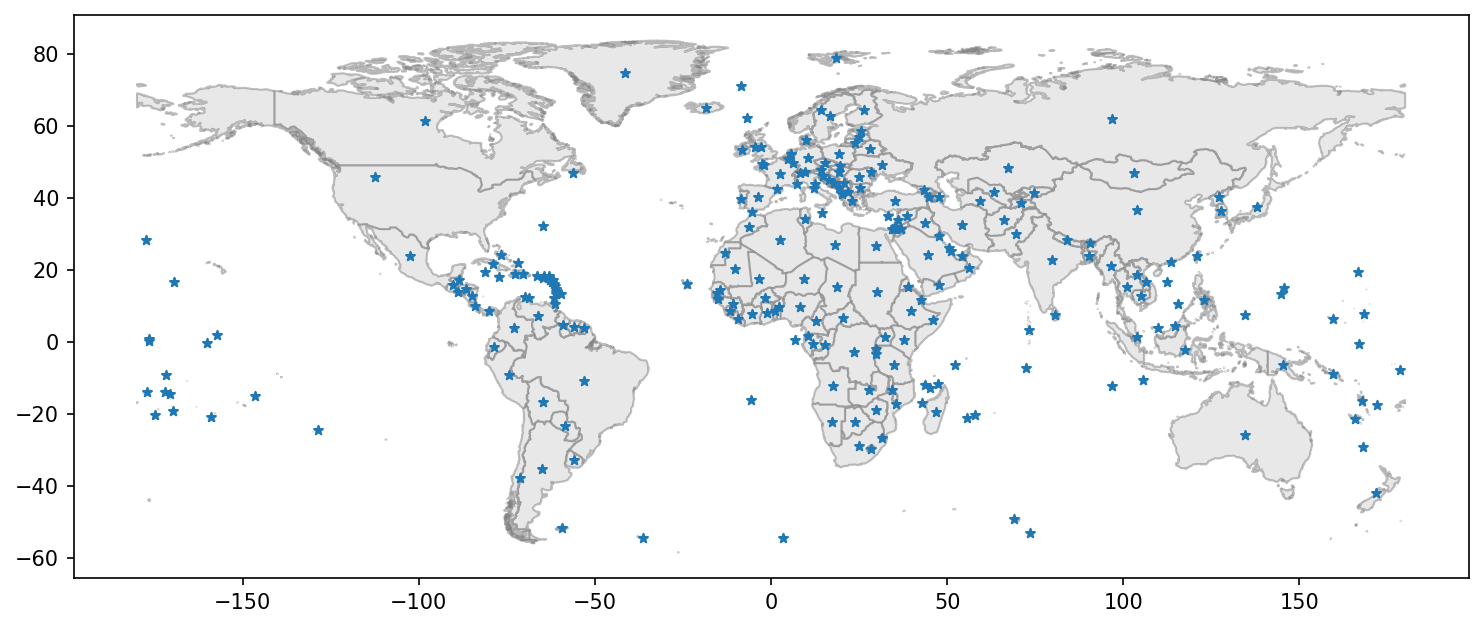

In [121]:
fig,ax=plt.subplots(figsize=(12,10))
world.plot(color='lightgrey',
                      edgecolor='grey',
                      alpha=.5,
                      ax=ax)

centers=world.centroid

# Add another layer using the same ax
centers.plot(markersize=20,ax=ax,marker='*')

In [122]:
world_meters=world.to_crs(epsg=32663)

In [123]:
world_meters.crs

<Projected CRS: EPSG:32663>
Name: WGS 84 / World Equidistant Cylindrical
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World Equidistant Cylindrical
- method: Equidistant Cylindrical
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

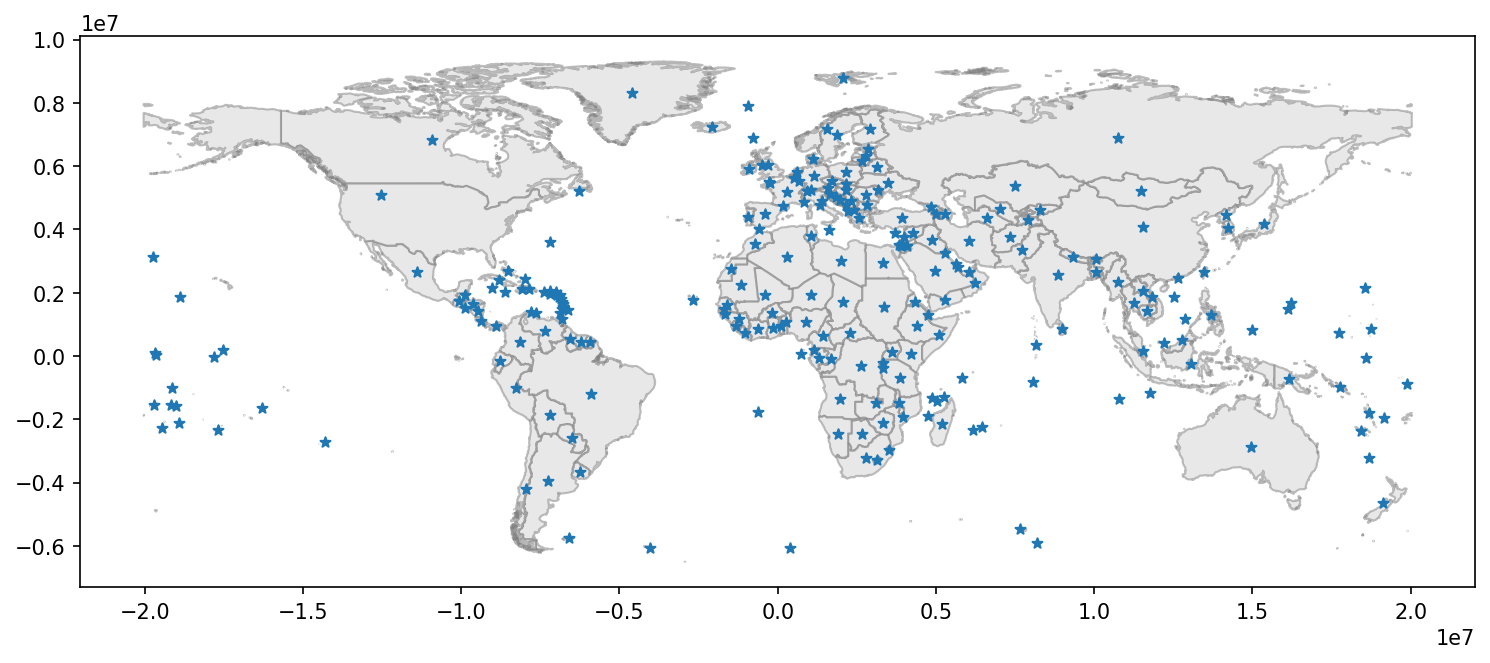

In [124]:
fig,ax=plt.subplots(figsize=(12,10))
world_meters.plot(color='lightgrey',
                      edgecolor='grey',
                      alpha=.5,
                      ax=ax)

centers=world_meters.centroid

# Add another layer using the same ax
centers.plot(markersize=25,ax=ax,marker='*')
# plt.savefig('centroids.png')

In [125]:
#compute pair-distance combinations of countries.
countries=df.exporter.unique()

countriesexp=[]
countriesimp=[]
distances=[]
s=0

for country1 in countries:
    countries_tocompare=df[df.exporter==country1].importer.unique()
    for country2 in countries_tocompare:
        
        #get distances between centroids of each country
        
        center1=world_meters[world_meters.CNTRY_NAME==country1].centroid
        center2=world_meters[world_meters.CNTRY_NAME==country2].centroid
        
        try:
            distance=center1.values.distance(center2.values)/(1e3)
        except ValueError as e:
            continue 
         
        try:
            distances.append(distance[0])
            countriesexp.append(country1)
            countriesimp.append(country2)
        except IndexError as e: # Show pairs of countries which exhibits an error calculating their distances
            print(country1,'-------',country2)
            print(center1,'-------',center2)

Belgium-Luxembourg ------- China, Hong Kong SAR
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
Belgium-Luxembourg ------- Cote d'Ivoire
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
Belgium-Luxembourg ------- Ethiopia PDR
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
Belgium-Luxembourg ------- Réunion
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
Belgium-Luxembourg ------- Serbia and Montenegro
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
Belgium-Luxembourg ------- Yugoslav SFR
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
China, Macao SAR ------- China, Hong Kong SAR
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
Myanmar ------- Belgium-Luxembourg
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)
Myanmar ------- China, Hong Kong SAR
GeoSeries([], dtype: geometry) ------- GeoSeries([], dtype: geometry)

In [126]:
df_distances=pd.DataFrame({'importer':countriesimp,'exporter':countriesexp,'distance_Km':distances})

In [127]:
# df_distances.to_csv('distan_datasets/distances_countries_inKM.csv')

In [128]:
df_distances=pd.read_csv('distan_datasets/distances_countries_inKM.csv',index_col=0)

NameError: name 'sns' is not defined

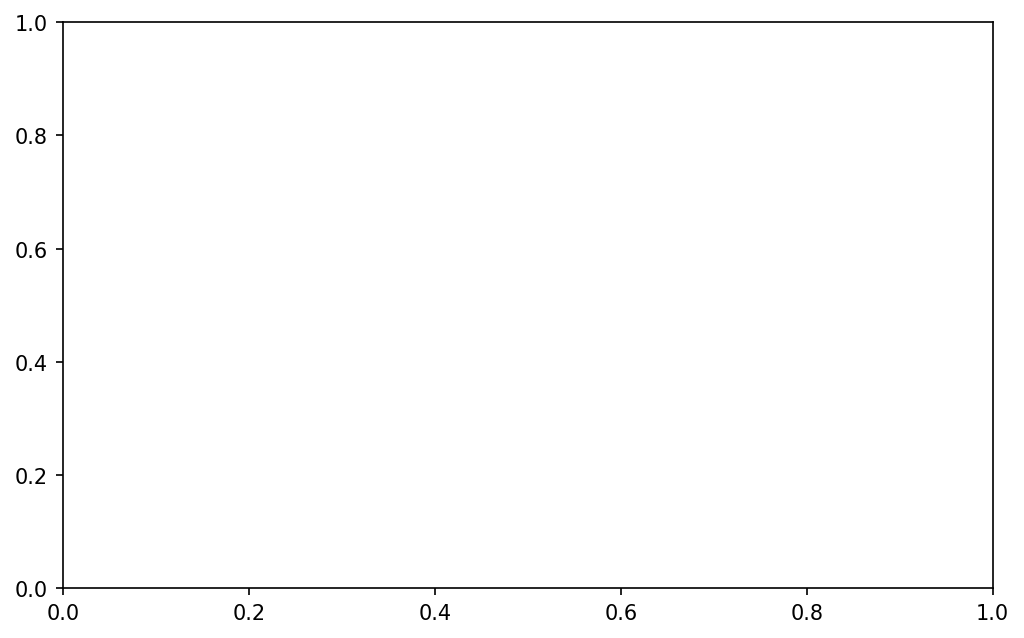

In [82]:
fig,ax=plt.subplots(figsize=(8,5))
sns.distplot(df_distances.distance_Km,ax=ax,hist_kws={"histtype": "step"})
# plt.savefig('distribucion_distancias.png')

In [21]:
df_distances

,importer,exporter,distance_Km
0,Afghanistan,Argentina,16512.332211
1,Albania,Argentina,12750.948242
2,Algeria,Argentina,10343.796015
3,Antigua and Barbuda,Argentina,5873.677383
4,Armenia,Argentina,14872.769716
...,...,...,...
12276,New Zealand,Tonga,38658.364716
12277,Pakistan,Federated States of Micronesia,10355.914193
12278,Poland,Federated States of Micronesia,16392.052248
12279,South Korea,Anguilla,21346.177084


In [129]:
exporter_distances=df_distances.groupby(['exporter']).agg([np.sum,np.mean])
exporter_distances.head()

distance_Km              
                          sum          mean
exporter                                   
Afghanistan     346946.727651   7228.056826
Albania         110899.946921   3824.136101
Algeria         132796.209215   3794.177406
American Samoa  346665.890519  19259.216140
Andorra          26274.887867   4379.147978

In [130]:
exporter_distances.columns=exporter_distances.columns.get_level_values(1)
exporter_distances.reset_index(inplace=True)
exporter_distances

,exporter,sum,mean
0,Afghanistan,3.469467e+05,7228.056826
1,Albania,1.108999e+05,3824.136101
2,Algeria,1.327962e+05,3794.177406
3,American Samoa,3.466659e+05,19259.216140
4,Andorra,2.627489e+04,4379.147978
...,...,...,...
214,Vietnam,1.671754e+06,10926.496009
215,Western Sahara,6.280210e+03,6280.210452
216,Yemen,1.286195e+05,5144.778780
217,Zambia,3.122742e+05,6245.484226


In [131]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [132]:
world_meters.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-7779254.556 1381598.437, -7786458.3..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-6872741.975 1952605.545, -687..."
2,3,Afghanistan,"POLYGON ((6821275.225 3963780.538, 6823482.132..."
3,4,Algeria,"POLYGON ((-573533.033 3359674.498, -572089.488..."
4,5,Azerbaijan,"MULTIPOLYGON (((5012252.392 4567499.721, 50104..."


In [133]:
type(world_meters)

geopandas.geodataframe.GeoDataFrame

In [134]:
exporter_distances.rename(columns={'exporter':'CNTRY_NAME'},inplace=True)
world_meters=pd.merge_ordered(world_meters,exporter_distances,on='CNTRY_NAME')

In [135]:
world_meters.head()

,OBJECTID,CNTRY_NAME,geometry,sum,mean
0,3,Afghanistan,"POLYGON ((6821275.225 3963780.538, 6823482.132...",346946.727651,7228.056826
1,6,Albania,"POLYGON ((2314546.339 4500818.605, 2314022.746...",110899.946921,3824.136101
2,4,Algeria,"POLYGON ((-573533.033 3359674.498, -572089.488...",132796.209215,3794.177406
3,10,American Samoa,"POLYGON ((-19007123.613 -1600279.467, -1900773...",346665.890519,19259.216140
4,8,Andorra,"POLYGON ((160949.416 4742426.710, 165479.505 4...",26274.887867,4379.147978


In [136]:
world_meters.set_geometry('geometry',inplace=True)

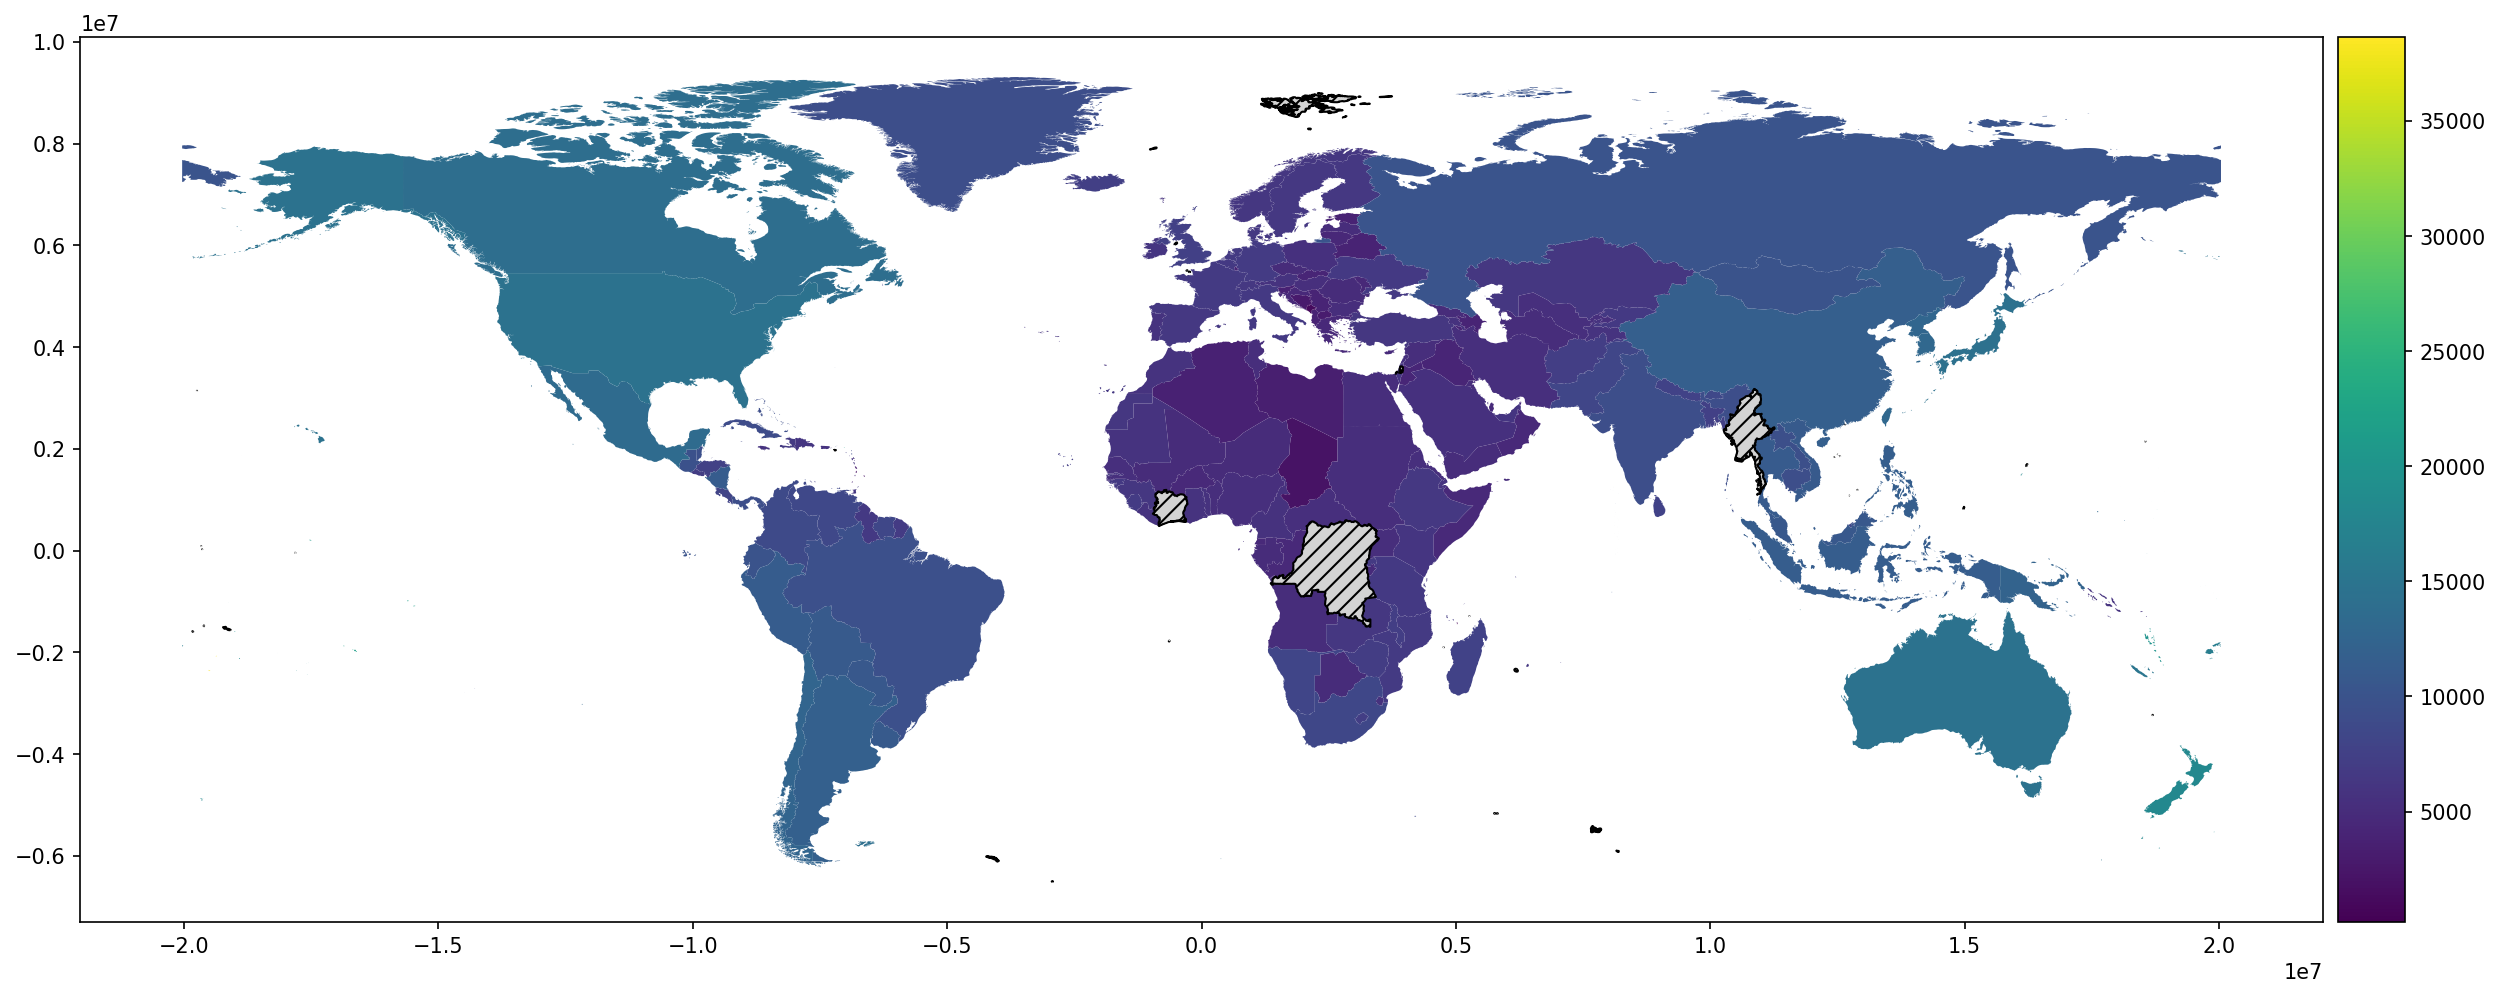

In [137]:
missing_kwds={"color": "lightgrey","edgecolor": "black","hatch": "///","label": "Missing values"}

fig,ax = plt.subplots(figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="3%",pad=0.1)

world_meters.plot(column='mean',ax=ax,missing_kwds=missing_kwds,legend=True,cax=cax)
# plt.savefig('distancias_plots/mean_distanceMAP.png')

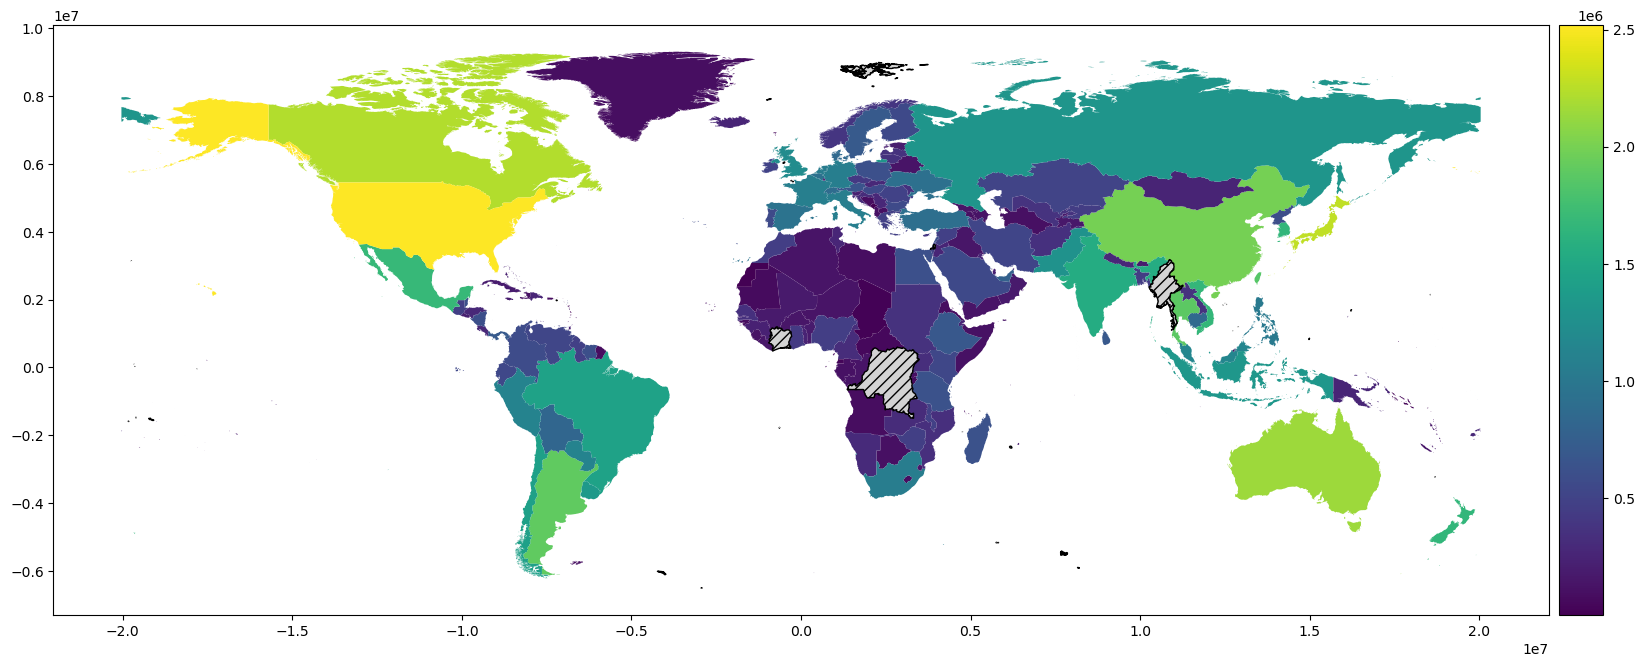

In [20]:
fig,ax = plt.subplots(figsize=(20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="3%",pad=0.1)

world_meters.plot(column='sum',ax=ax,legend=True,cax=cax,missing_kwds=missing_kwds)
# plt.savefig('distancias_plots/sum_distanceMAP.png')

## preprocessing distances df

In [138]:
df_distances=pd.read_csv('distan_datasets/distances_countries_inKM.csv',index_col=0)
df=pd.read_csv('../united_names_datasets/tradeMatrix_PWG.csv')

In [139]:
# filter only quantity column to reduce size of data.
# group by year, then by exporter 
yedf=df[df.Element=='Import Quantity'].groupby(['Year','exporter'])

In [140]:
# Select different countries that received commodities from exporter countries
yedf=yedf.apply(lambda row:row['importer'].unique())

In [141]:
YEI=yedf.reset_index() # year, exporter, importer
YEI.rename(columns={0:'importer'},inplace=True)

In [142]:
ncols=YEI.columns.shape[0] # copied lists [:] to have different objects 
dic_YEI_distances={key:lista[:] for key, lista in zip(YEI.columns,[[]]*ncols)}

assert dic_YEI_distances['Year'] is not dic_YEI_distances['exporter'], "check if vars point to the same object"

In [143]:
for year,exporter,importers in YEI.values:
    for importer in importers:
        dic_YEI_distances['Year'].append(year)
        dic_YEI_distances['exporter'].append(exporter)
        dic_YEI_distances['importer'].append(importer)
    
distances_YEI = pd.DataFrame(dic_YEI_distances)

In [144]:
distances=[]
for importer, exporter in zip(distances_YEI.exporter,distances_YEI.importer):
    try:
        distances.append(float(df_distances[
            (df_distances.importer==importer) & (df_distances.exporter==exporter)].distance_Km.values))
    except TypeError as e:
        distances.append(np.nan)

In [147]:
distances_YEI['distance'] = distances

In [149]:
# distances_YEI.to_csv('distan_datasets/distances_YEI.csv')

# DISTANCE NORMALIZATION

In [150]:
distances_YEI=pd.read_csv('distan_datasets/distances_YEI.csv',index_col=0)
df=pd.read_csv('../united_names_datasets/tradeMatrix_PWG.csv')

In [151]:
def norm_distance(x,case):
    """Assumes x is a column pandas series (column of dataframe)"""
    
    distances_exp=distances_YEI.groupby('Year')['distance'].sum()
    
    if case.lower()=='global_min':
        # multiply x by factors between 0 and 1 that account for the distance each year
        norm_factor=distances_exp.min()/distances_exp
        return x*norm_factor
    
    elif case.lower()=='global_max':
        norm_factor=distances_exp/distances_exp.max()
        return x*norm_factor
    
    elif case=='nrml_max':
        def nrml_max(a):    # Normalize in [0,1]
            return (a - a.min()) / (a.max() - a.min())
        
        norm_factor=nrml_max(distances_exp)
        return x*norm_factor
    
    elif case == 'nrml_min':
        def nrml_min(a):
            return (a-a.max())/(a.max()-a.min())
        
        norm_factor=nrml_min(distances_exp)
        return x*norm_factor

In [152]:
def nrml_(a):   # Normalize in [-1,1]
    return 2*(a - a.min()) / (a.max() - a.min()) -1

def nrml(a):    # Normalize in [0,1]
            return (a - a.min()) / (a.max() - a.min())

In [153]:
normfact=distances_YEI.groupby('Year')['distance'].sum()
normfact=normfact.min()/normfact

In [154]:
normfact_v2=distances_YEI.groupby('Year')['distance'].sum()
normfact_v2=normfact_v2/normfact_v2.max()

In [155]:
normfact_v3=distances_YEI.groupby('Year')['distance'].sum()
normfact_v3=(normfact_v3 - normfact_v3.min())/(normfact_v3.max()-normfact_v3.min())

In [156]:
normfact_v4=distances_YEI.groupby('Year')['distance'].sum()
normfact_v4=(normfact_v4 - normfact_v4.max())/(normfact_v4.min()-normfact_v4.max())

In [157]:
pd.DataFrame({'global_min':normfact,'global_max':normfact_v2,'nrml_max':normfact_v3,'nrml_min':normfact_v4})

,global_min,global_max,nrml_max,nrml_min
Year,,,,
1986,0.963622,0.322092,0.016990,0.983010
1987,1.000000,0.310375,0.000000,1.000000
1988,0.956833,0.324378,0.020304,0.979696
1989,0.968928,0.320329,0.014433,0.985567
1990,0.917171,0.338405,0.040645,0.959355
1991,0.833334,0.372450,0.090012,0.909988
1992,0.782459,0.396667,0.125128,0.874872
1993,0.756045,0.410525,0.145224,0.854776
1994,0.670587,0.462841,0.221085,0.778915


In [158]:
# create a dictionary with global amount of trade
    # quantity = Total imports 
    # mean_val = Average price 

items = df.groupby('Item').groups.keys()
glob_dict = {}            
py = df.groupby('Year')  # py = Per Year 
for year, group in py:
    glob_dict[year] = {}
    for itm in items:
        glob_dict[year][itm] = {}
        glob_dict[year][itm]['quantity'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Quantity']['Value'].sum()
        glob_dict[year][itm]['mean_val'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Value']['Value'].mean()  

norm_dict = {}    # create a new dictionary for normalizing values
for itm in items:
    norm_dict[itm] = {}

    for year in range(1986, 2018):
        norm_dict[itm][year] = {}
        norm_dict[itm][year]['qt'] = glob_dict[year][itm]['quantity']
        norm_dict[itm][year]['vl'] = glob_dict[year][itm]['mean_val']

for itm in items:  # add normalized values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict[itm]).transpose()
    dfa['nqt'] = nrml(dfa['qt'])
    dfa['nvl'] = nrml(dfa['vl'])
    for year in range(1986, 2018):
        glob_dict[year][itm]['qnt'] = dfa.loc[year]['nqt']
        glob_dict[year][itm]['val'] = dfa.loc[year]['nvl']

In [163]:
for year in range(1987, 2018):  #  Calculate differences of trade values on consecutive years 
    for itm in items:
        glob_dict[year][itm]['delta_qt'] = np.abs(glob_dict[year][itm]['qnt'] - glob_dict[year-1][itm]['qnt'])
        glob_dict[year][itm]['delta_pr'] = np.abs(glob_dict[year][itm]['val'] - glob_dict[year-1][itm]['val'])
        
        
norm_dict2 = {}    # create a dictionary for normalizing delta values
for itm in items:
    norm_dict2[itm] = {}
    for year in range(1987, 2018):
        norm_dict2[itm][year] = {}
        norm_dict2[itm][year]['delta_pr'] = glob_dict[year][itm]['delta_pr']
        norm_dict2[itm][year]['delta_qt'] = glob_dict[year][itm]['delta_qt']


for itm in items:  # add normalized delta values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict2[itm]).transpose()
    
    dfa['distance_delta_qt_n'] = norm_distance(dfa['delta_qt'],case='global_min')
    dfa['distance_delta_pr_n'] = norm_distance(dfa['delta_pr'],case='global_min')
    
    for year in range(1987, 2018):
        
        glob_dict[year][itm]['distance_pertb_pr'] = dfa.loc[year]['distance_delta_pr_n']
        glob_dict[year][itm]['distance_pertb_qt'] = dfa.loc[year]['distance_delta_qt_n']


In [164]:
for year in range(1987, 2018):  # take yearly mean of perturbation over Item list ...
    glob_dict[year]['distance_PERTB_pr'] = pd.DataFrame(glob_dict[year]).transpose()['distance_pertb_pr'].mean()
    glob_dict[year]['distance_PERTB_qt'] = pd.DataFrame(glob_dict[year]).transpose()['distance_pertb_qt'].mean()


DF = pd.DataFrame(glob_dict).transpose()
DF['distance_perturb_pr'] = nrml(DF['distance_PERTB_pr'])  # ... and Normalize them 
DF['distance_perturb_qt'] = nrml(DF['distance_PERTB_qt'])

for year in range(1987, 2018):             # Add normalized perturbations values to global dictionary 
    glob_dict[year]['distance_pertN_pr'] = DF.loc[year]['distance_perturb_pr']
    glob_dict[year]['distance_pertN_qt'] = DF.loc[year]['distance_perturb_qt']

In [165]:
dict_perts = {}    #   Create dictionary and DataFrame for perturbations 
for year in range(1987, 2018):
    dict_perts[year] = {}
    for x in ['distance_pertN_pr','distance_pertN_qt']:
        dict_perts[year][x] = glob_dict[year][x]
    for itm in items:
        for y in ['distance_pertb_pr', 'distance_pertb_qt']:
            dict_perts[year][itm+y[-3:]] = glob_dict[year][itm][y]
        

dfperts = pd.DataFrame(dict_perts).transpose()    
dfperts

,distance_pertN_pr,distance_pertN_qt,Barley_pr,Barley_qt,"Beans, dry_pr","Beans, dry_qt",Chick peas_pr,Chick peas_qt,"Groundnuts, shelled_pr","Groundnuts, shelled_qt",...,Oats_pr,Oats_qt,Rice - total (Rice milled equivalent)_pr,Rice - total (Rice milled equivalent)_qt,Sorghum_pr,Sorghum_qt,Soybeans_pr,Soybeans_qt,Wheat_pr,Wheat_qt
1987,0.387291,0.594686,0.088274,0.019803,0.368423,0.314681,0.251753,0.081660,0.064094,0.002666,...,0.018173,0.061359,0.005930,0.038225,0.096943,0.076619,0.011073,0.018858,0.073391,0.084402
1988,0.642143,0.415059,0.151706,0.080257,0.140216,0.053256,0.203212,0.013693,0.008459,0.002150,...,0.229284,0.137940,0.151171,0.004556,0.029670,0.098647,0.002410,0.023914,0.245166,0.064109
1989,0.810232,0.953710,0.132815,0.004069,0.002097,0.098038,0.027179,0.041811,0.002063,0.039493,...,0.509938,0.177032,0.124358,0.058112,0.419459,0.390439,0.047473,0.009841,0.214677,0.066058
1990,1.000000,1.000000,0.260830,0.143846,0.337378,0.169350,0.083903,0.029972,0.115228,0.041405,...,0.330236,0.052612,0.176913,0.060166,0.321754,0.275587,0.051033,0.011145,0.288447,0.108897
1991,0.441425,0.282849,0.000662,0.044534,0.266975,0.010971,0.050960,0.004573,0.078006,0.108526,...,0.131919,0.009330,0.023582,0.019382,0.158968,0.007826,0.004713,0.015924,0.155007,0.065483
1992,0.312183,0.335482,0.109710,0.017365,0.095082,0.035589,0.008523,0.016496,0.139103,0.027181,...,0.142351,0.012085,0.010938,0.022383,0.064063,0.096032,0.014651,0.023850,0.049509,0.028147
1993,0.331981,0.711900,0.052734,0.045708,0.147104,0.103848,0.006479,0.030764,0.028978,0.047780,...,0.034297,0.125318,0.066881,0.006392,0.117032,0.057890,0.037556,0.009666,0.001023,0.016284
1994,0.426143,0.900018,0.051635,0.047880,0.155657,0.124627,0.093126,0.062065,0.012782,0.079096,...,0.040871,0.070346,0.176126,0.082924,0.037808,0.055177,0.003752,0.007751,0.090157,0.048406
1995,0.183092,0.177705,0.027106,0.004468,0.033186,0.026798,0.010223,0.002795,0.024695,0.025400,...,0.072650,0.028838,0.079517,0.005310,0.071101,0.108962,0.002552,0.017850,0.045328,0.012874
1996,0.298384,0.199207,0.095457,0.019076,0.087237,0.038595,0.067314,0.053047,0.024986,0.000258,...,0.267269,0.007959,0.098774,0.016233,0.009237,0.100836,0.013704,0.017516,0.105278,0.011673


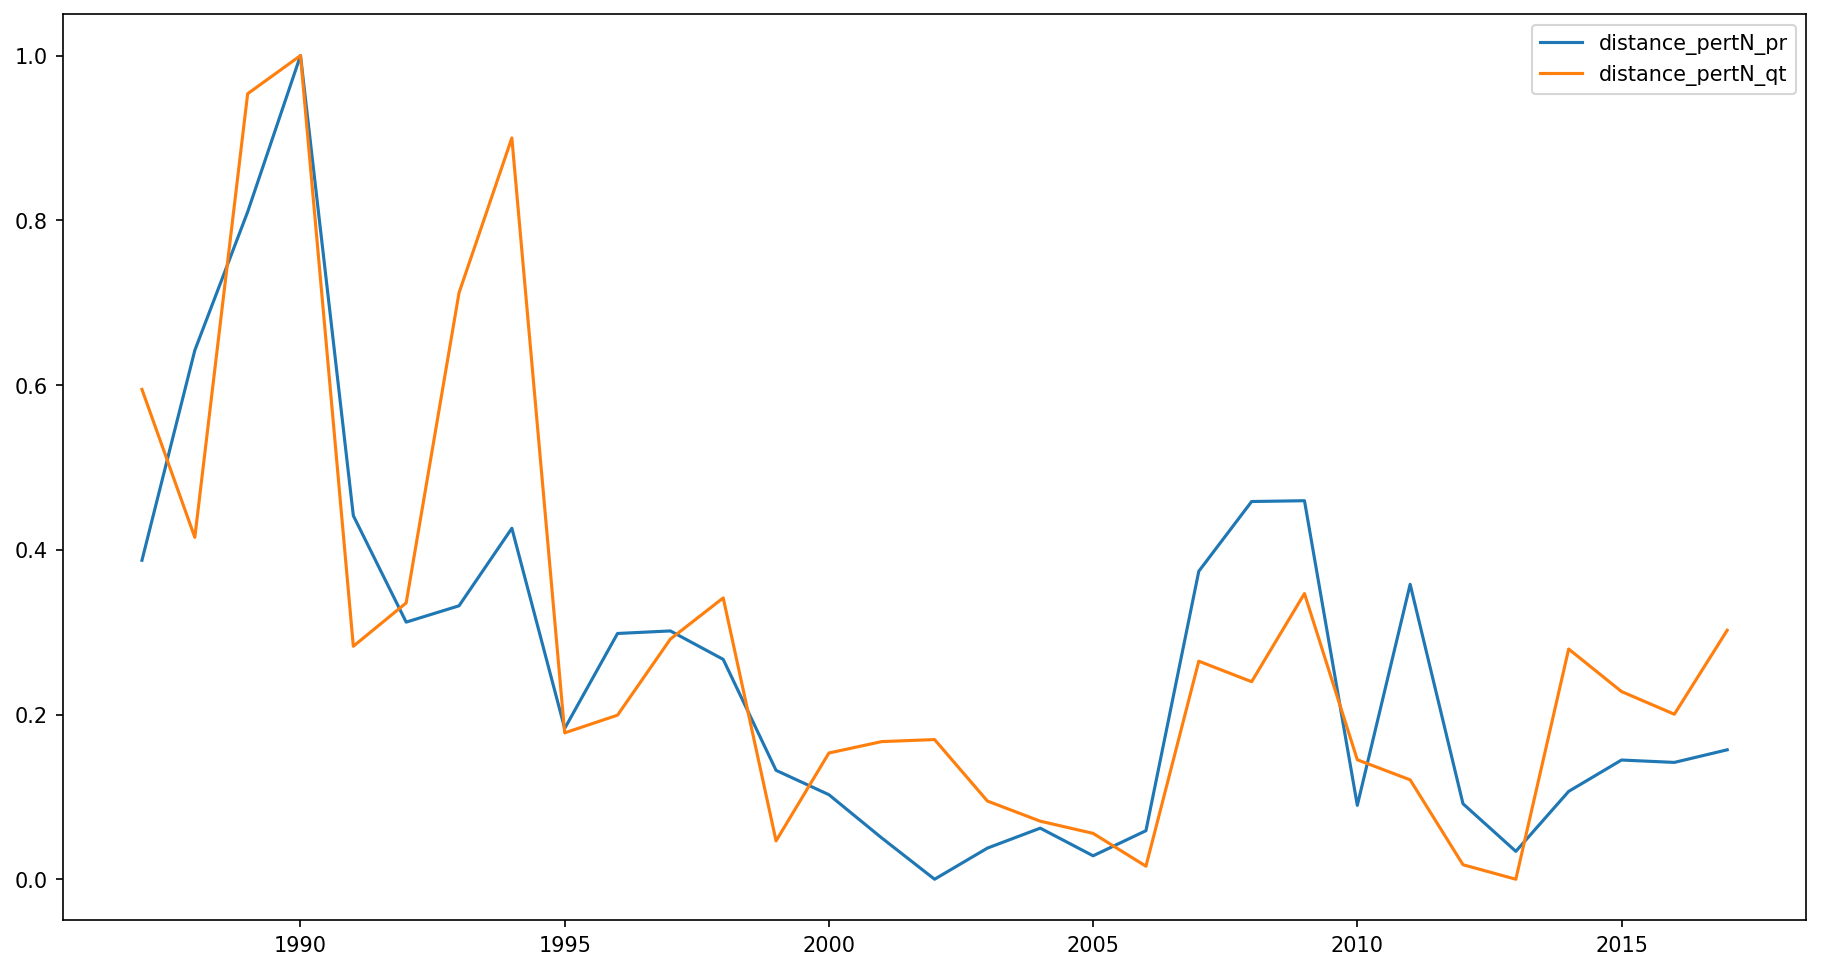

In [166]:
dfperts.plot(y=[x for x in dfperts.columns if x[:len('distance')]=='distance'], figsize=(15, 8))

In [167]:
import sys
sys.path.insert(1,'../.')

In [168]:
from read_network import get_network

In [169]:
lg=get_network()

In [170]:
#  create a dictionary with amount of trade per country
    # quantity = Total imports 
    # mean_val = Average price     
    
items = df.groupby('Item').groups.keys()
dict_country = {}            
pc = df.groupby('Year')  # pc = Per Country 

for name, group in df.groupby('importer'):
    dict_country[name] = {}
    
for name, group in df.groupby('exporter'):
    if name not in dict_country.keys():
        dict_country[name] = {}

year = int(1986)
for G in lg:
    for x in G.nodes():
        dict_country[x][year] = {}
        for y in G.out_edges(x):        
            for key, val in G[y[0]][y[1]].items():
                for k, v in val.items():
                    dict_country[x][year]['exp_'+key+'_'+k] = v
        for y in G.in_edges(x):
            for key, val in G[y[0]][y[1]].items():
                for k, v in val.items():
                    dict_country[x][year]['imp_'+key+'_'+k] = v
    year += 1

In [171]:
def nrml_(a):   # Normalize in [-1,1]
    return 2*(a - a.min()) / (a.max() - a.min()) -1

In [172]:
for key, val in dict_country.items():
    xxx = pd.DataFrame(val).transpose()
    for col in xxx.columns:
        xxx[col] = nrml(xxx[col])
        xxx['dlt_'+col] = xxx[col] - xxx[col].shift(1)
        xxx['dlt_'+col] = nrml_(xxx['dlt_'+col])
    for year in range(1987, 2018):
        try:
            dict_country[key][year]['dlt_in_pr'] = xxx.drop([xc for xc in xxx.columns if 'dlt_imp_' != xc[:8] or '_value' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_in_vl'] = xxx.drop([xc for xc in xxx.columns if 'dlt_imp_' != xc[:8] or '_weight' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_ex_pr'] = xxx.drop([xc for xc in xxx.columns if 'dlt_exp_' != xc[:8] or '_value' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_ex_vl'] = xxx.drop([xc for xc in xxx.columns if 'dlt_exp_' != xc[:8] or '_weight' not in xc ], axis=1).transpose()[year].mean()
        except: 
            print (key, year)

Afghanistan 2014
Armenia 1987
Armenia 1989
Armenia 1992
Armenia 1994
Armenia 2000
Armenia 2001
Armenia 2003
Armenia 2004
Armenia 2012
Armenia 2014
Armenia 2015
Aruba 2000
Aruba 2001
Aruba 2003
Aruba 2008
Aruba 2014
Aruba 2015
Azerbaijan 1987
Azerbaijan 1989
Azerbaijan 1992
Azerbaijan 2000
Azerbaijan 2003
Azerbaijan 2004
Azerbaijan 2012
Azerbaijan 2014
Azerbaijan 2015
Bahamas, The 1987
Bahamas, The 1989
Bahamas, The 1992
Bahamas, The 2000
Bahamas, The 2004
Bahamas, The 2014
Bahamas, The 2015
Bahrain 2001
Bahrain 2003
Bahrain 2004
Bahrain 2012
Bahrain 2014
Bahrain 2015
Bangladesh 1992
Bangladesh 2014
Bangladesh 2015
Belgium 1987
Belgium 1989
Belgium 1992
Belgium 1994
Belgium 1998
Belgium 2000
Belgium 2001
Belgium 2003
Belgium 2004
Belgium 2009
Belgium 2012
Belgium 2013
Belgium 2014
Belgium 2015
Belgium-Luxembourg 1988
Belgium-Luxembourg 1991
Belgium-Luxembourg 1993
Belgium-Luxembourg 1995
Belgium-Luxembourg 1996
Belgium-Luxembourg 1997
Belgium-Luxembourg 1999
Belgium-Luxembourg 2002
Belg

Niger 2000
Niger 2014
Papua New Guinea 1989
Papua New Guinea 1994
Papua New Guinea 1998
Papua New Guinea 2001
Papua New Guinea 2004
Papua New Guinea 2012
Papua New Guinea 2013
Qatar 1992
Qatar 2003
Qatar 2014
Qatar 2015
Russia 1992
Russia 2000
Russia 2003
Russia 2004
Russia 2014
Russia 2015
Rwanda 1992
Rwanda 2000
Rwanda 2001
Rwanda 2004
Rwanda 2012
Rwanda 2014
Rwanda 2015
Rwanda 2017
Réunion 1988
Réunion 1990
Réunion 1991
Réunion 1993
Réunion 1995
Réunion 1996
Réunion 1997
Réunion 1999
Réunion 2002
Réunion 2005
Réunion 2006
Réunion 2007
Réunion 2008
Réunion 2009
Réunion 2010
Réunion 2011
Réunion 2013
Réunion 2016
Réunion 2017
Sao Tome and Principe 1987
Sao Tome and Principe 1988
Sao Tome and Principe 1990
Sao Tome and Principe 1992
Sao Tome and Principe 1994
Sao Tome and Principe 1996
Sao Tome and Principe 1998
Sao Tome and Principe 2000
Sao Tome and Principe 2001
Sao Tome and Principe 2003
Sao Tome and Principe 2005
Sao Tome and Principe 2009
Sao Tome and Principe 2013
Sao Tome and P

Czechoslovakia 1987
Czechoslovakia 1988
Czechoslovakia 1989
Czechoslovakia 1990
Czechoslovakia 1991
Czechoslovakia 1993
Czechoslovakia 1995
Czechoslovakia 1996
Czechoslovakia 1997
Czechoslovakia 1998
Czechoslovakia 1999
Czechoslovakia 2002
Czechoslovakia 2005
Czechoslovakia 2006
Czechoslovakia 2007
Czechoslovakia 2008
Czechoslovakia 2010
Czechoslovakia 2011
Czechoslovakia 2013
Czechoslovakia 2016
Czechoslovakia 2017
Dominican Republic 2014
Dominican Republic 2015
Equatorial Guinea 1987
Equatorial Guinea 1989
Equatorial Guinea 1990
Equatorial Guinea 1991
Equatorial Guinea 1992
Equatorial Guinea 1993
Equatorial Guinea 1995
Equatorial Guinea 1996
Equatorial Guinea 1997
Equatorial Guinea 1998
Equatorial Guinea 1999
Equatorial Guinea 2000
Equatorial Guinea 2001
Equatorial Guinea 2002
Equatorial Guinea 2005
Equatorial Guinea 2006
Equatorial Guinea 2007
Equatorial Guinea 2011
Equatorial Guinea 2012
Equatorial Guinea 2013
Equatorial Guinea 2014
Equatorial Guinea 2015
Equatorial Guinea 2017
Eri

Puerto Rico 1988
Puerto Rico 1990
Puerto Rico 1991
Puerto Rico 1993
Puerto Rico 1995
Puerto Rico 1996
Puerto Rico 1997
Puerto Rico 1999
Puerto Rico 2002
Puerto Rico 2003
Puerto Rico 2005
Puerto Rico 2006
Puerto Rico 2007
Puerto Rico 2008
Puerto Rico 2010
Puerto Rico 2011
Puerto Rico 2015
Puerto Rico 2016
Puerto Rico 2017
Saint Helena, Ascension and Tristan da Cunha 1988
Saint Helena, Ascension and Tristan da Cunha 1989
Saint Helena, Ascension and Tristan da Cunha 1991
Saint Helena, Ascension and Tristan da Cunha 1992
Saint Helena, Ascension and Tristan da Cunha 1994
Saint Helena, Ascension and Tristan da Cunha 1995
Saint Helena, Ascension and Tristan da Cunha 1996
Saint Helena, Ascension and Tristan da Cunha 1997
Saint Helena, Ascension and Tristan da Cunha 1998
Saint Helena, Ascension and Tristan da Cunha 1999
Saint Helena, Ascension and Tristan da Cunha 2001
Saint Helena, Ascension and Tristan da Cunha 2002
Saint Helena, Ascension and Tristan da Cunha 2003
Saint Helena, Ascension and

In [173]:
dictotal = {} 
i = 0
j = 0
lp = []
for country in dict_country.keys():
    dictotal[country] = {}
    for year in dict_perts.keys():
        dictotal[country][year] = {}
        try:
            dictotal[country][year]['distance_af_in_pr'] = -1*dict_country[country][year]['dlt_in_pr'] * dict_perts[year]['distance_pertN_pr']
            dictotal[country][year]['distance_af_in_vl'] = -1*dict_country[country][year]['dlt_in_vl'] * dict_perts[year]['distance_pertN_qt']
            dictotal[country][year]['distance_af_ex_pr'] = dict_country[country][year]['dlt_ex_pr'] * dict_perts[year]['distance_pertN_pr']
            dictotal[country][year]['distance_af_ex_vl'] = dict_country[country][year]['dlt_ex_vl'] * dict_perts[year]['distance_pertN_qt']
            dictotal[country][year]['distance_af_in_pr2'] = -1*dict_country[country][year]['dlt_in_pr'] * (dict_perts[year]['distance_pertN_pr'] + dict_perts[year]['distance_pertN_qt'])/2
            dictotal[country][year]['distance_af_in_vl2'] = -1*dict_country[country][year]['dlt_in_vl'] * (dict_perts[year]['distance_pertN_pr'] + dict_perts[year]['distance_pertN_qt'])/2
            dictotal[country][year]['distance_af_ex_pr2'] = dict_country[country][year]['dlt_ex_pr'] * (dict_perts[year]['distance_pertN_pr'] + dict_perts[year]['distance_pertN_qt'])/2
            dictotal[country][year]['distance_af_ex_vl2'] = dict_country[country][year]['dlt_ex_vl'] * (dict_perts[year]['distance_pertN_pr'] + dict_perts[year]['distance_pertN_qt'])/2
            
        except:
            j += 1
            lp += [country]
        i += 1
print('total loops = ',i, 'total exceptions = ',j)

total loops =  7502 total exceptions =  1925


In [174]:
tk = {}
for key, val in dictotal.items():
    tk[key] = {}
    ddff = pd.DataFrame(val).transpose()
    for col in ddff.columns:
        tk[key][col] = ddff[col].mean()

In [5]:
afs = pd.DataFrame(tk).transpose()
# afs.to_csv('distan_datasets/distances_af_percountry.csv')

NameError: name 'tk' is not defined

In [11]:
afs=pd.read_csv('distan_datasets/distances_af_percountry.csv',index_col=0)

In [12]:
tk=afs.T.to_dict()

In [13]:
grc = df.groupby('importer')
for name, group in grc: 
    qt = group.loc[group['Element'] == 'Import Quantity']
    tk[name]['tot_imp_qt'] = np.sum(qt['Value'])
    vl = group.loc[group['Element'] == 'Import Value']
    tk[name]['tot_imp_vl'] = np.sum(vl['Value'])

grc = df.groupby('exporter')
for name, group in grc: 
    qt = group.loc[group['Element'] == 'Import Quantity']
    tk[name]['tot_exp_qt'] = np.sum(qt['Value'])
    vl = group.loc[group['Element'] == 'Import Value']
    tk[name]['tot_exp_vl'] = np.sum(vl['Value'])

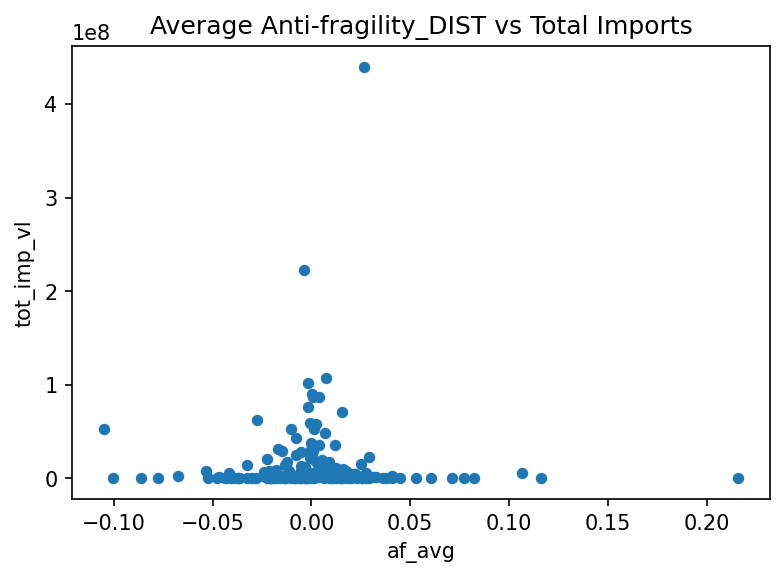

In [21]:
ttk = pd.DataFrame(tk).transpose().drop(['tot_imp_qt', 'tot_imp_vl', 'tot_exp_qt', 'tot_exp_vl'], axis=1)
ttk = ttk[['distance_af_in_pr', 'distance_af_in_vl', 'distance_af_ex_pr', 'distance_af_ex_vl',
       'distance_af_in_pr2', 'distance_af_in_vl2', 'distance_af_ex_pr2', 'distance_af_ex_vl2']]

tttk = pd.DataFrame(tk).transpose()
tttk['af_avg'] = ttk.transpose().describe().transpose()['mean']

tttk.plot(kind='scatter', y='tot_imp_vl', x='af_avg', figsize=(6,4), title="Average Anti-fragility_DIST vs Total Imports")

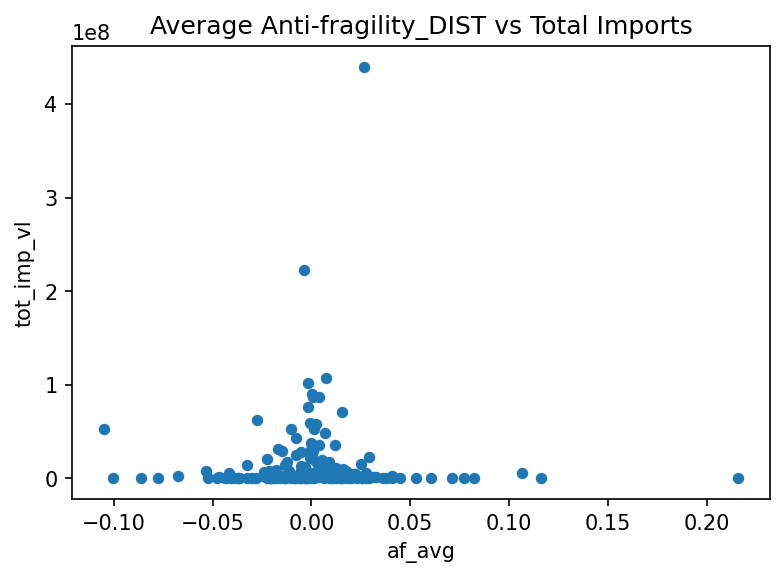

In [178]:
ttk = pd.DataFrame(tk).transpose().drop(['tot_imp_qt', 'tot_imp_vl', 'tot_exp_qt', 'tot_exp_vl'], axis=1)
ttk = ttk[['distance_af_in_pr', 'distance_af_in_vl', 'distance_af_ex_pr', 'distance_af_ex_vl',
       'distance_af_in_pr2', 'distance_af_in_vl2', 'distance_af_ex_pr2', 'distance_af_ex_vl2']]

tttk = pd.DataFrame(tk).transpose()
tttk['af_avg'] = ttk.transpose().describe().transpose()['mean']

tttk.plot(kind='scatter', y='tot_imp_vl', x='af_avg', figsize=(6,4), title="Average Anti-fragility_DIST vs Total Imports")


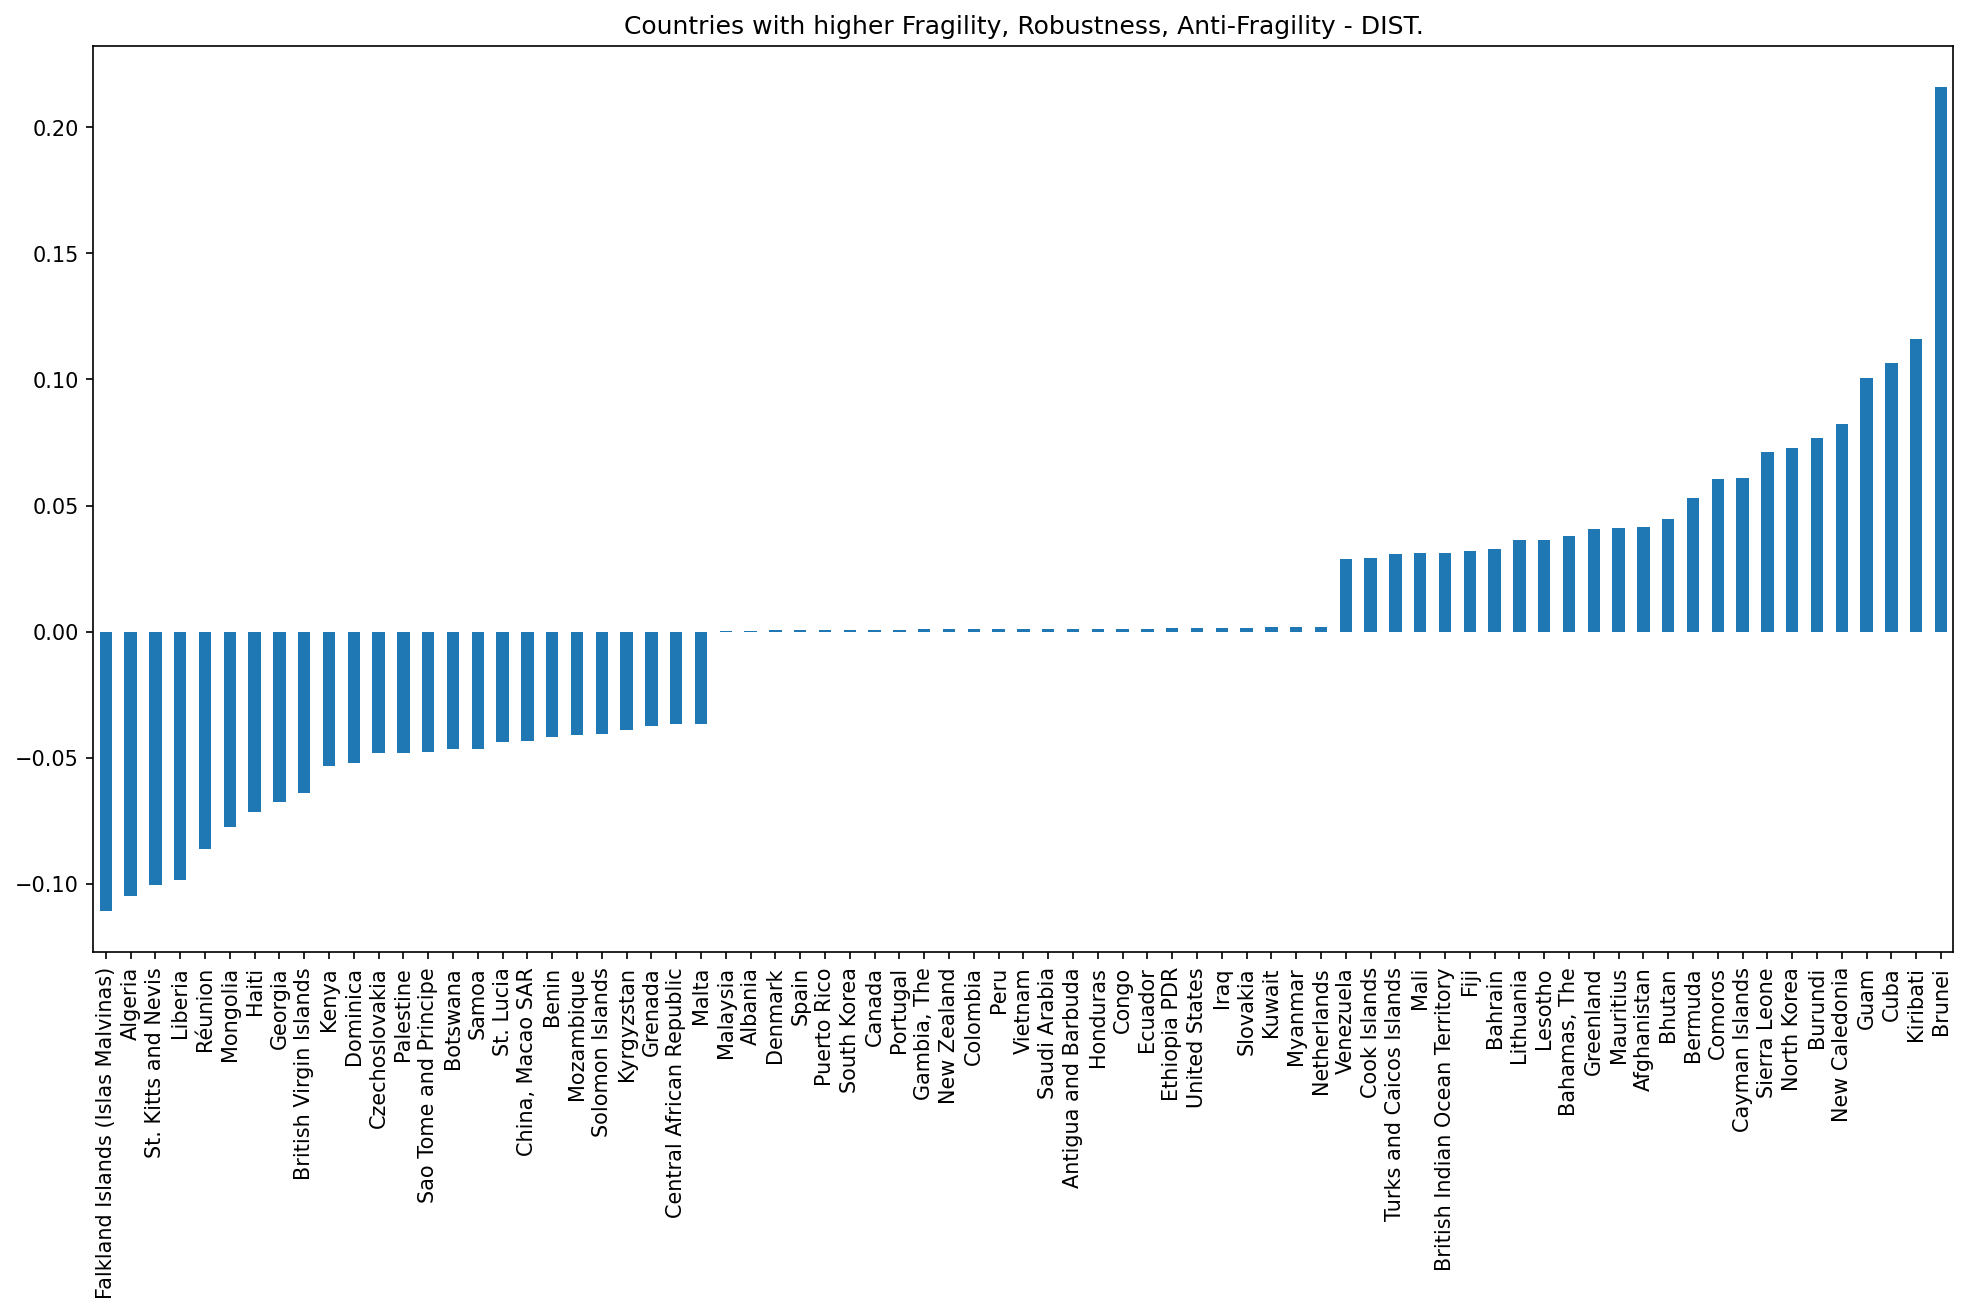

In [179]:
ttk.drop([col for col in ttk.columns if 'in' not in col], axis=1)
top = ttk.transpose().describe().transpose()['mean'].sort_values().head(int(25)) #.plot(kind='bar', figsize=(16,8))
bot = ttk.transpose().describe().transpose()['mean'].dropna().sort_values().tail(int(25)) #.plot(kind='bar', figsize=(16,8))
med = ttk.transpose().describe().transpose()['mean'].abs().sort_values().head(int(25))#.plot(kind='bar', figsize=(16,8))
top.append(med.append(bot)).plot(kind='bar', figsize=(16,8), title="Countries with higher Fragility, Robustness, Anti-Fragility - DIST.")

In [53]:
import networkx as nx

In [54]:
DG=nx.Graph()

In [72]:
DG.add_weighted_edges_from([tuple(edge) for edge in df_distances.values])

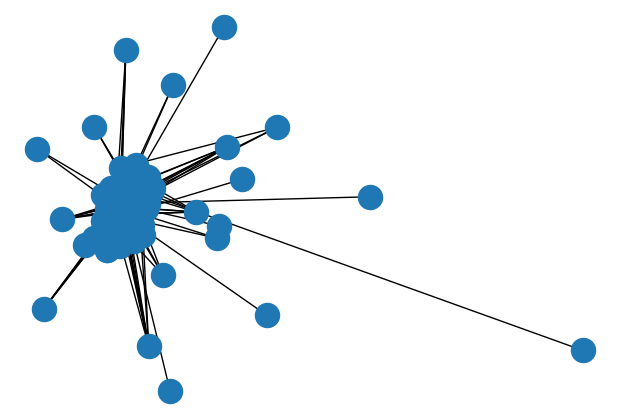

In [84]:
nx.draw(DG)